In [15]:
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt 

In [16]:
def scale(img, cx, cy):
    #This function scales an image with a factor 
    #cx on the x-axis, and cy on the y-axis

    scale_mat = np.array([[cx, 0],
                          [0, cy]])

    #Create matrix which can contain the new image
    scaled_img = np.zeros((int(img.shape[0]*cx), int(img.shape[1]*cy)))

    #Iterate over all xy-coordinated
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            intensity = img[x,y]                        #Get intensity from pos xy
            xy = np.array([x, y])                       #Get pos xy
            new_xy = scale_mat@xy.T                     #find new pos xy 
            new_xy = new_xy.astype(int).flatten()       #Make sure new_xy is int so it can be used as indexes. 
            scaled_img[new_xy[0], new_xy[1]] = intensity#Put intensity at new coordinate
    
    return scaled_img

In [17]:
def rotate(img, theta):
    #Rotate an image theta degrees
    scale = 1.5 #Hyperparameter controlling the output image size. (If not bigger than 1 we get some weird artifacts.)
    

    rotation_mat = np.array([[np.cos(theta), -np.sin(theta)],
                             [np.sin(theta),  np.cos(theta)]])

    x0, y0 = int(img.shape[0]/2), int(img.shape[1]/2)
    

    # rotated_img = np.zeros(img.shape)
    rotated_img = np.zeros((int(img.shape[0]*scale), int(img.shape[1]*scale)))
    
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            
            intensity = img[x, y]           #Get intensity from pos xy
            xy = np.array([[x-x0, y-y0]])   #Get pos xy, Change origo from top left corner, to center of image
            new_xy = rotation_mat@xy.T      #Find new coordinates

            #This looks ugly, but we're setting the origo back to top left
            new_xy = np.array([[int(new_xy[0,0]+scale*x0)], [int(new_xy[1,0]+scale*y0)]]).flatten() 
            
            # Set intensity at rotated xy-coordinate
            rotated_img[new_xy[0], new_xy[1]] = intensity
            
    
    return rotated_img

In [18]:
def translate(img, tx, ty):
    #Translate an image tx on the x-axis,
    #and ty on the y-axis

    translated_img = np.zeros(img.shape)

    #Iterate over all xy-coordinated
    for x in range(img.shape[0] - tx):
        for y in range(img.shape[1] - ty):
            intensity = img[x,y]                        #Get intensity from pos xy
            new_x, new_y = x + tx, y + ty
            
            # #If the new coordinates are out of bounds, ignore them.
            # if new_x >= img.shape[0] or new_y >= img.shape[1]:
            #     pass 
            # else: 
            translated_img[new_x, new_y] = intensity

    return translated_img

In [19]:
def shear(img, sv, sh):
    #Shear an image vertically (x-axis) with a factor sv, 
    #and horizontaly (y-axis) sh

    shear_mat = np.array([[1, sv],
                          [sh, 1]])
    
    x_shape = np.ceil(img.shape[0]*np.ceil(1 + sv)).astype(int) #Scale x-axis in new image to fit all new coordinates
    y_shape = np.ceil(img.shape[1]*np.ceil(1 + sh)).astype(int) #Scale y-axis in new image to fit all new coordinates
    sheared_img = np.zeros((x_shape, y_shape))


    #Iterate over all xy-coordinated
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            intensity = img[x,y]                        #Get intensity from pos xy
            xy = np.array([x, y])                       #Get pos xy
            new_xy = shear_mat@xy.T                     #find new pos xy 
            new_x, new_y = new_xy.flatten().astype(int) #Make sure new_xy is int so it can be used as indexes.
            sheared_img[new_x, new_y] = intensity       #Set new coords to intensity
    
    return sheared_img

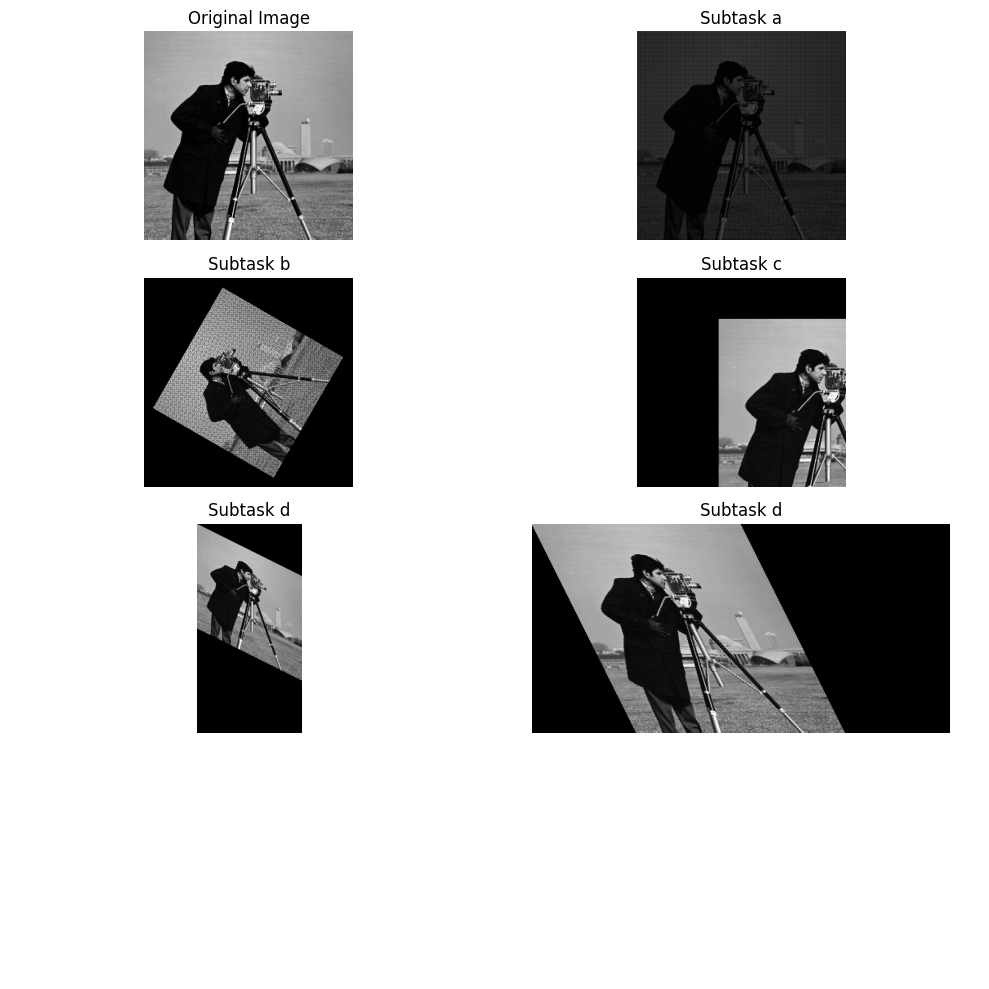

In [20]:
#Load and convert image to numpy
img_path = 'Data/Fig0222(b)(cameraman).tif'
img = Image.open(img_path)
img = np.asarray(img)


fig, ax = plt.subplots(4,2,figsize=(10,10))
ax[0,0].imshow(img, cmap='gray')
ax[0,0].set_title('Original Image')

#Subtask a
ax[0,1].imshow(scale(img, 2, 2), cmap='gray')
ax[0,1].set_title('Subtask a')

#Subtask b
ax[1,0].imshow(rotate(img, np.pi/3), cmap='gray')
ax[1,0].set_title('Subtask b')

#Subtask c 
ax[1,1].imshow(translate(img, 50, 100), cmap='gray')
ax[1,1].set_title('Subtask c')

#Subtask d
ax[2,0].imshow(shear(img, 0.5, 0), cmap='gray')
ax[2,0].set_title('Subtask d')

ax[2,1].imshow(shear(img, 0, 0.5), cmap='gray')
ax[2,1].set_title('Subtask d')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()
plt.close()



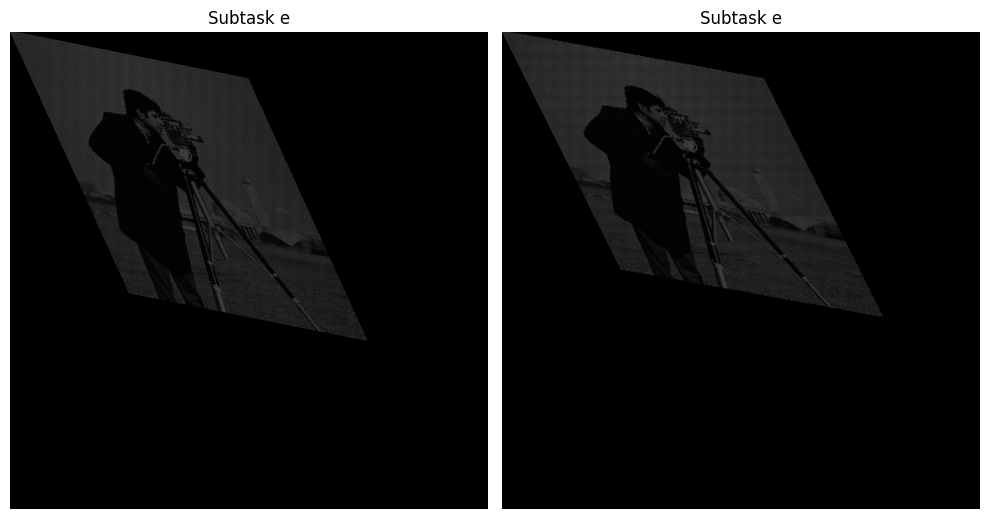

In [21]:
#Subtask e
fig, az = plt.subplots(1,2,figsize=(10,10))
az[0].imshow(shear(scale(shear(img, 0, 0.5), 2, 2), 0.2, 0), cmap='gray')
az[0].set_title('Subtask e')

az[1].imshow(scale(shear(shear(img, 0.2, 0), 0, 0.5), 2, 2), cmap='gray')
az[1].set_title('Subtask e')

for a in az.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()
plt.close()

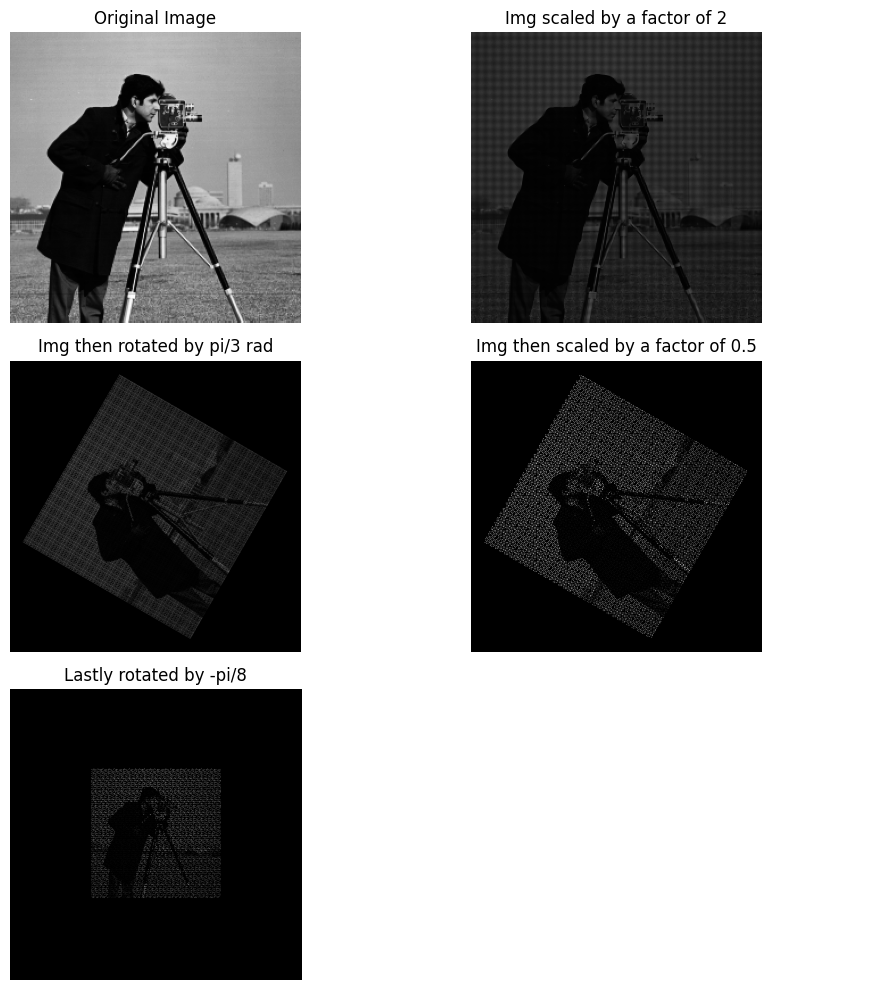

In [22]:
fig, ay = plt.subplots(3,2,figsize=(10,10))
ay[0,0].imshow(img, cmap='gray')
ay[0,0].set_title('Original Image')

ay[0,1].imshow(scale(img, 2, 2), cmap='gray')
ay[0,1].set_title('Img scaled by a factor of 2')

ay[1,0].imshow(rotate(scale(img, 2, 2), np.pi/3), cmap='gray')
ay[1,0].set_title('Img then rotated by pi/3 rad')

ay[1,1].imshow(scale(rotate(scale(img, 2, 2), np.pi/3), 0.5, 0.5), cmap='gray')
ay[1,1].set_title('Img then scaled by a factor of 0.5')

ay[2,0].imshow(rotate(scale(rotate(scale(img, 2, 2), np.pi/3), 0.5, 0.5), -np.pi/3), cmap='gray')
ay[2,0].set_title('Lastly rotated by -pi/8')

for a in ay.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()